In [2]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_Data_Sampled.csv')

In [ ]:
Correlations
EDA

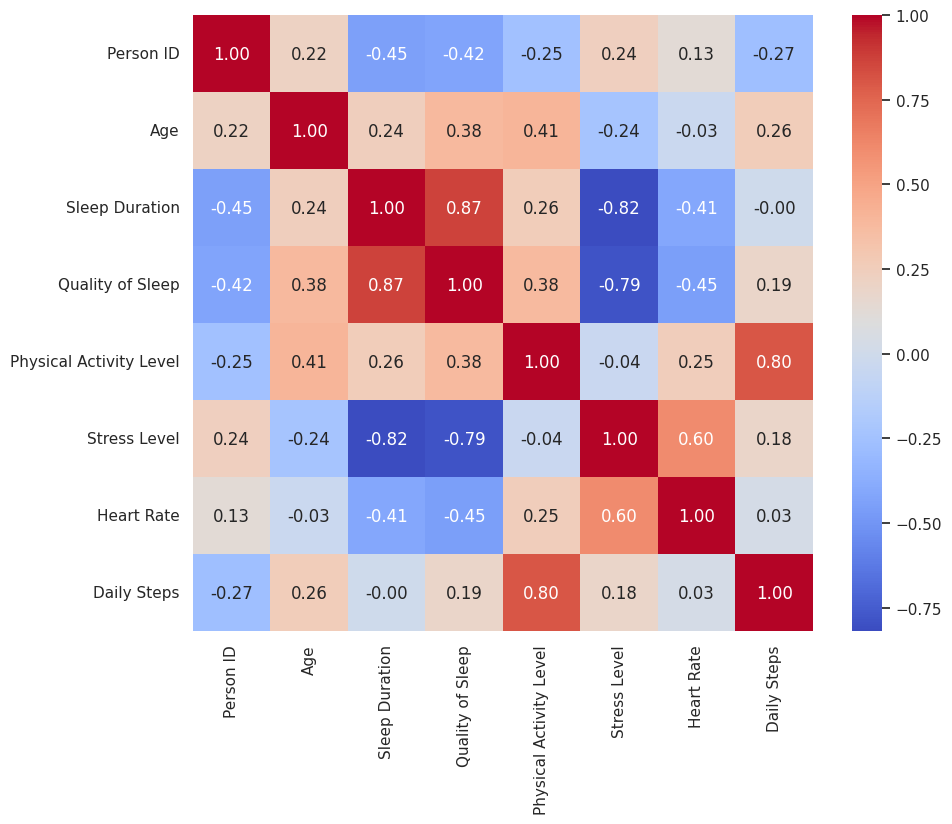

In [6]:
plt.figure(figsize=(10, 8))
# Calculate correlation only for numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

Feature Engineering Part 01

In [8]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_columns))
print("Categorical Columns:", list(categorical_columns))

Numeric Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [9]:
# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
# Remove rows with systolic > 180 or diastolic > 120
df = df[(df['Systolic'] <= 180) & (df['Diastolic'] <= 120)]
print(df[['Systolic', 'Diastolic']].head())

   Systolic  Diastolic
0       120         80
1       135         90
2       126         83
3       120         80
4       125         80


In [10]:
# Drop the 'Blood Pressure' column as it's now redundant
df.drop(columns=['Blood Pressure'], inplace=True)
df.drop(columns=['Person ID'], inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,71,7100,Healthy,120,80
1,Male,42,Teacher,6.90,8,52,4,Normal,66,7000,Healthy,135,90
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,74,6100,Healthy,126,83
3,Male,32,Doctor,6.90,6,52,7,Normal,71,6500,Healthy,120,80
4,Male,37,Lawyer,6.85,7,60,6,Normal,71,6500,Healthy,125,80


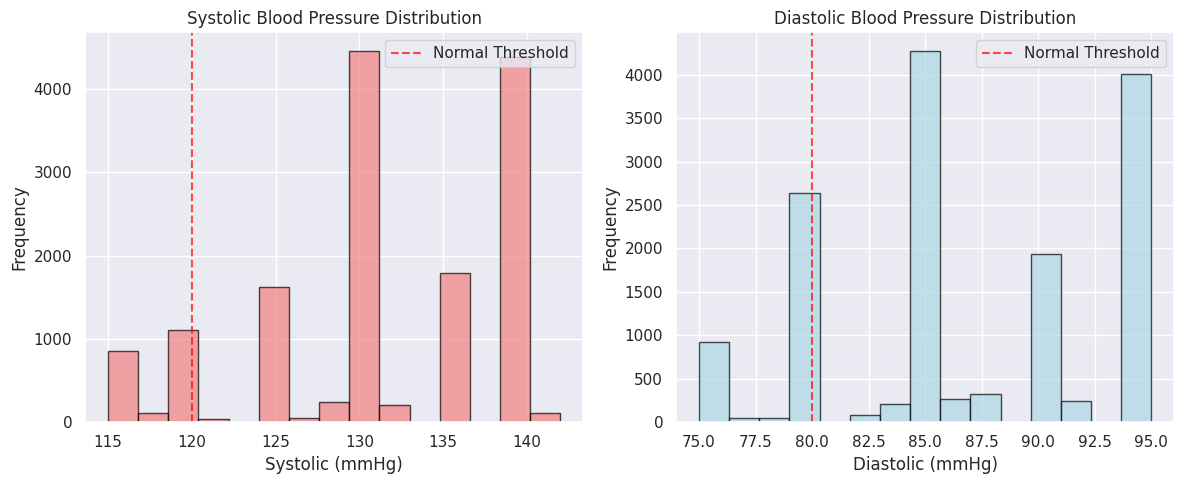

In [11]:
# After splitting - show distribution of new features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Systolic distribution
ax1.hist(df['Systolic'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
ax1.set_title('Systolic Blood Pressure Distribution')
ax1.set_xlabel('Systolic (mmHg)')
ax1.set_ylabel('Frequency')
ax1.axvline(120, color='red', linestyle='--', alpha=0.7, label='Normal Threshold')
ax1.legend()

# Diastolic distribution
ax2.hist(df['Diastolic'], bins=15, color='lightblue', edgecolor='black', alpha=0.7)
ax2.set_title('Diastolic Blood Pressure Distribution')
ax2.set_xlabel('Diastolic (mmHg)')
ax2.set_ylabel('Frequency')
ax2.axvline(80, color='red', linestyle='--', alpha=0.7, label='Normal Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

 split the composite field into two separate numerical features: Systolic and Diastolic. This is crucial because systolic and diastolic pressures have different clinical implications and should be analyzed separately by our machine learning models.

 removed the original composite 'Blood Pressure' column as it became redundant, and also dropped the 'Person ID' column as it's merely an identifier with no predictive value.

In [12]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_columns))
print("Categorical Columns:", list(categorical_columns))

Numeric Columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
